In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df=pd.read_csv('Resources/customer_data.csv')

In [3]:
customer_df.head(10)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Female,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Female,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,9,27,Male,19154,College,East,Regular,occasional,5819,Clothing,0,5
9,10,28,Female,24666,HighSchool,North,Regular,rare,8779,Food,0,6


In [4]:
print(customer_df['loyalty_status'].value_counts(), end = "\n\n")
print(customer_df['education'].value_counts(), end = "\n\n")
print(customer_df['region'].value_counts(), end = "\n\n")
print(customer_df['gender'].value_counts(), end = "\n\n")
print(customer_df['product_category'].value_counts(), end = "\n\n")

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

gender
Female    50074
Male      49926
Name: count, dtype: int64

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64



In [5]:
new_customer_df = customer_df.drop([ 'id', 'income', 'education', 'region',
                 'loyalty_status','product_category','promotion_usage', 'satisfaction_score'], axis=1,)
new_customer_df.head(12)


,age,gender,purchase_frequency,purchase_amount
0,27,Male,frequent,18249
1,29,Male,rare,4557
2,37,Male,rare,11822
3,30,Male,frequent,4098
4,31,Female,occasional,19685
5,38,Male,occasional,2822
6,32,Female,frequent,3293
7,24,Female,rare,21794
8,27,Male,occasional,5819
9,28,Female,rare,8779


In [6]:
sns.set_style("dark")

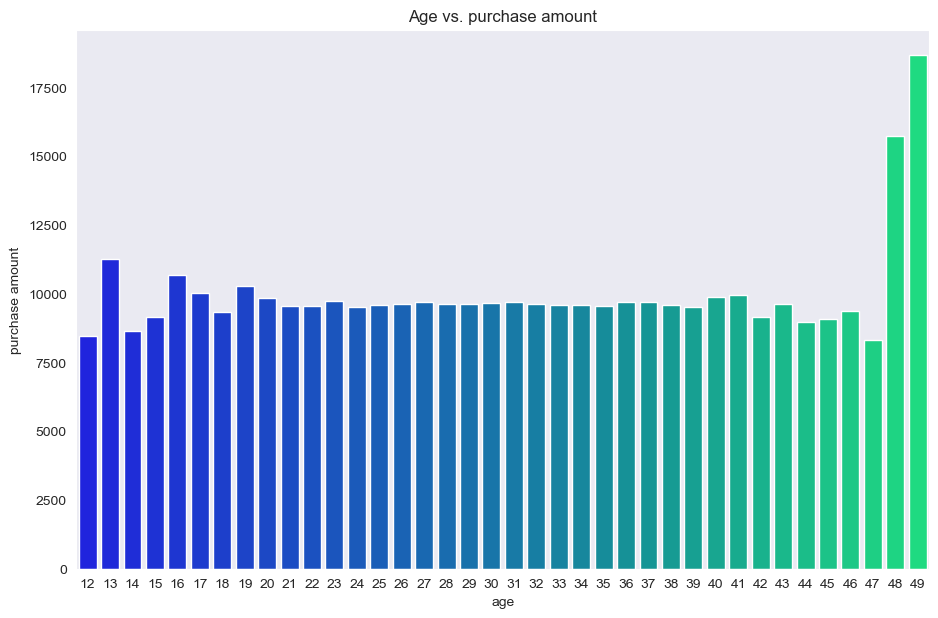

In [7]:
age_purchase_graph= plt.figure(figsize = (11, 7))
sns.barplot(x='age', y='purchase_amount', data= new_customer_df, ci=None,
           palette= 'winter')
plt.title('Age vs. purchase amount')
plt.xlabel('age')
plt.ylabel('purchase amount')
plt.show()

In [8]:
new_customer_df.groupby('age').purchase_amount.mean()

age
12     8455.333333
13    11269.000000
14     8633.846154
15     9166.974359
16    10685.772727
17    10017.699301
18     9345.206009
19    10266.124726
20     9856.582773
21     9570.668071
22     9553.513966
23     9748.220030
24     9528.345638
25     9590.613262
26     9630.954267
27     9684.267872
28     9615.519598
29     9609.652154
30     9654.836698
31     9716.646038
32     9618.124844
33     9595.328251
34     9589.517136
35     9546.379848
36     9707.389339
37     9684.183537
38     9596.143495
39     9525.514167
40     9863.445748
41     9936.266112
42     9155.739669
43     9616.656000
44     8959.051724
45     9083.857143
46     9372.090909
47     8315.153846
48    15745.500000
49    18666.000000
Name: purchase_amount, dtype: float64

In [9]:
gender_purchase_count = new_customer_df.groupby(['gender', 'purchase_frequency'])['purchase_frequency'].size()
gender_purchase_count

gender  purchase_frequency
Female  frequent              10067
        occasional            14931
        rare                  25076
Male    frequent              10028
        occasional            14955
        rare                  24943
Name: purchase_frequency, dtype: int64

In [10]:
data = {'gender': ['Male', 'Female', 'Male', 'Male', 'Female','Female'],
        'abc': [10067, 14931, 25076, 10028, 14955,24943 ]}
df = pd.DataFrame(data)
sum_abc_by_gender = df.groupby('gender')['abc'].sum()
print(sum_abc_by_gender)

gender
Female    54829
Male      45171
Name: abc, dtype: int64


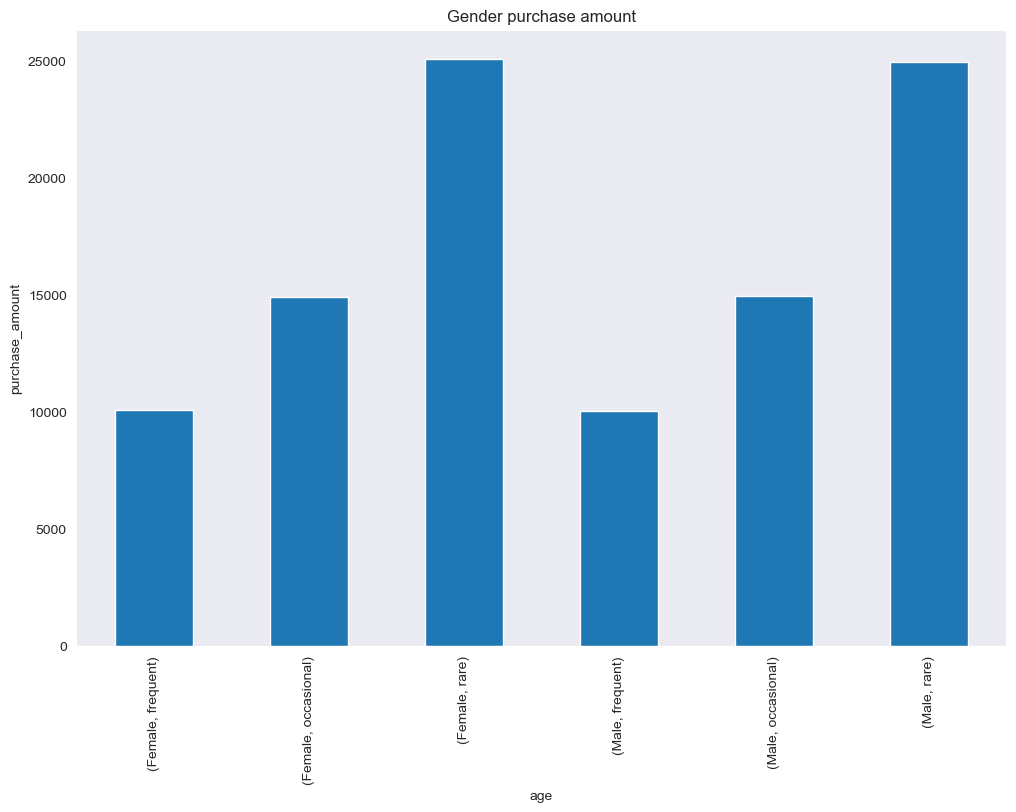

In [11]:
plt.figure(figsize=(12,8))
gender_purchase_count.plot(kind='bar', stacked=True)
plt.title('Gender purchase amount')
plt.xlabel('age')
plt.ylabel('purchase_amount')
plt.show()

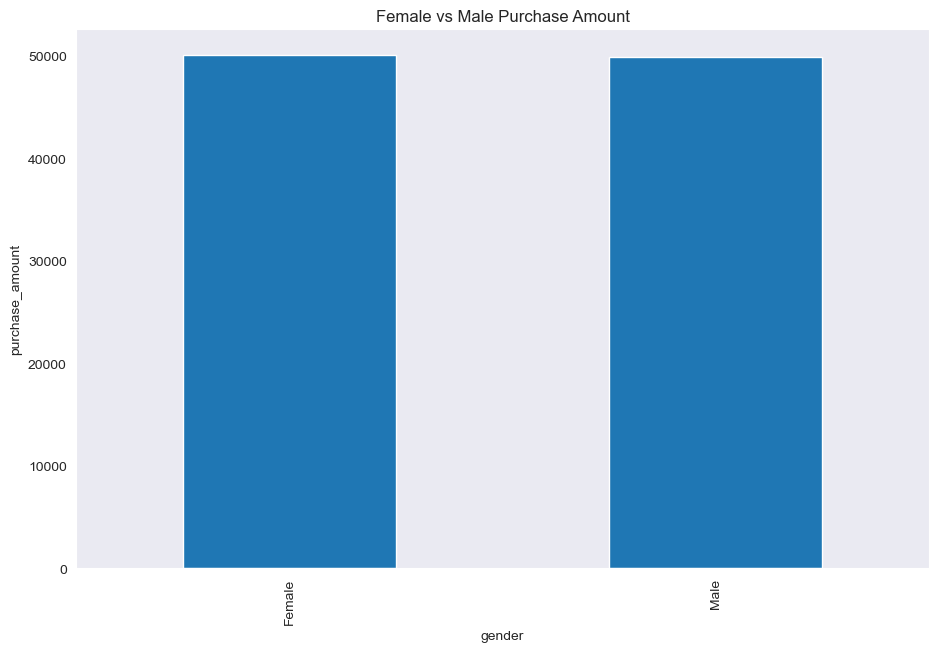

In [12]:
plt.figure(figsize = (11, 7))
new_customer_df.groupby('gender')['purchase_amount'].size().plot(kind='bar')
plt.title('Female vs Male Purchase Amount')
plt.xlabel('gender')
plt.ylabel('purchase_amount')
plt.show()